In [3]:
import os
import re
import numpy as np
# import scipy.io as sio
# import imageio
# import tqdm
# import matplotlib.pyplot as plt
# from matplotlib.animation import FFMpegWriter
# from utlis.projection import *                                 
from utlis.com_traga_utlis import plot_3d_trajectory, load_data

In [ ]:
weired_folders = ["/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_07_03/1691486_left_right_caffeine_1448",
    "/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_07_03/1691486_left_caffeine_1051",
    "/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_07_03/1691486_left_caffeine_1128"
]

for wie in weired_folders:
    
    com_foler = os.path.join(wie, 'COM/predict_results')
    com_path = os.path.join(com_foler, 'com3d.mat')   
    com_folder_save = os.path.join(com_foler, 'vis')
    
    com_data = load_data(com_path)

    # plot_3d_trajectory(com_data, graph_title, com_folder_save)
    jump_indices = detect_jumps(com_data, com_folder_save)

    # produce video, which is not necessary if not labeling more com to detect what's wrong


    save_path = os.path.join(com_foler, 'vis') #os.path.join(pred_path, 'vis')
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    generate_jump_video(com_data, base_base_folder, base_folder, jump_indices, graph_title, save_path, cam='Camera1')


    

Missing folders: 35
base_folder /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_07_12/240605PMC1_right_hole_11_27
folder_name 240605PMC1_right_hole_11_27
2


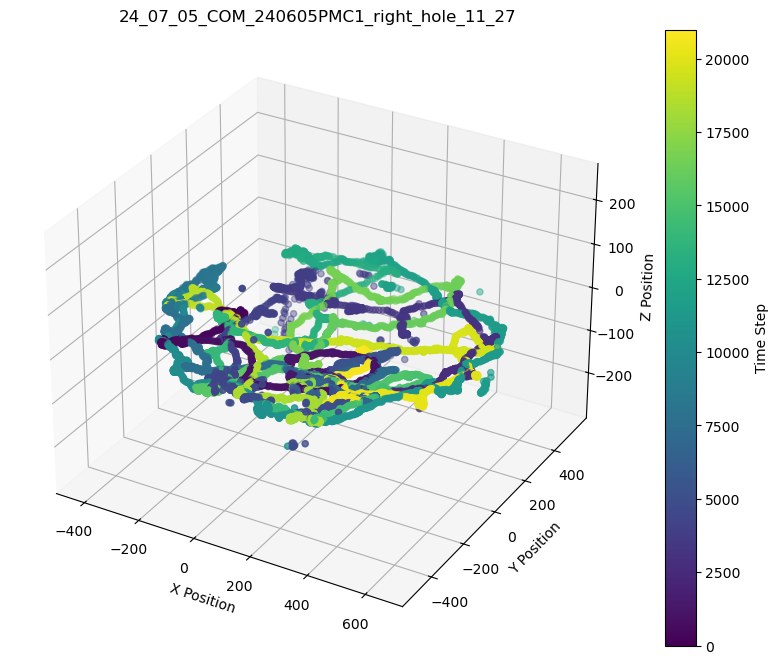

base_folder /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_07_12/240626V1_right_hole_10_31
folder_name 240626V1_right_hole_10_31


In [4]:
dates = ["2024_07_12"] #, "2024_06_27", "2024_06_28", "2024_07_01", "2024_07_02", "2024_07_03", "2024_06_26"



missing_folders = []
synced_name_path ="/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/mir_bundle_run/synced_folders"
for npy_file in os.listdir(synced_name_path):
    if npy_file.endswith('_missing_folders.npy'):
        npy_file_path = os.path.join(synced_name_path, npy_file)
        if os.path.isfile(npy_file_path):
            npy_missing_folders = np.load(npy_file_path)
            missing_folders.extend(npy_missing_folders.tolist())

# Print the missing folders to verify
print("Missing folders:", len(missing_folders))

summ_folder = '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/'
processed_count = 0
for date in dates:
    base_base_folder = os.path.join(summ_folder, date)
    for folder_name in os.listdir(base_base_folder):
        base_folder = os.path.join(base_base_folder, folder_name)
        # print('base_folder', base_folder)
        # print('folder_name', folder_name)
        if os.path.isdir(base_folder):
            if re.match(r'^\d', folder_name) and base_folder not in missing_folders:
                print('base_folder', base_folder)
                print('folder_name', folder_name)
                processed_count +=1
                graph_title = f'24_07_05_COM_{folder_name}'
                com_foler = os.path.join(base_folder, 'COM_240806weights/predict_results')
                com_path = os.path.join(com_foler, 'com3d.mat')
                if os.path.exists(com_path):
                    processed_count +=1
                    print(processed_count)
                    com_folder_save = os.path.join(com_foler, 'vis')
                    # print(com_folder_save)
                    if not os.path.exists(com_folder_save):
                        os.makedirs(com_folder_save)

                    com_data = load_data(com_path)
                    # vl_graph_title = f'Arnav_train COM Velocity {folder_name} sync'
                    # velocities are stupid becuase they are basically just jump_indices
                    # velocities = calculate_velocity(com_data)
                    # plot_velocity(velocities, vl_graph_title, com_folder_save)

                    plot_3d_trajectory(com_data, graph_title, com_folder_save)
                    # jump_indices = detect_jumps(com_data, com_folder_save)

                    # #produce video, which is not necessary if not labeling more com to detect what's wrong


                    # save_path = os.path.join(com_foler, 'vis') #os.path.join(pred_path, 'vis')
                    # if not os.path.exists(save_path):
                    #     os.makedirs(save_path)
                    # generate_jump_video(com_data, base_base_folder, base_folder, jump_indices, graph_title, save_path, cam='Camera1')




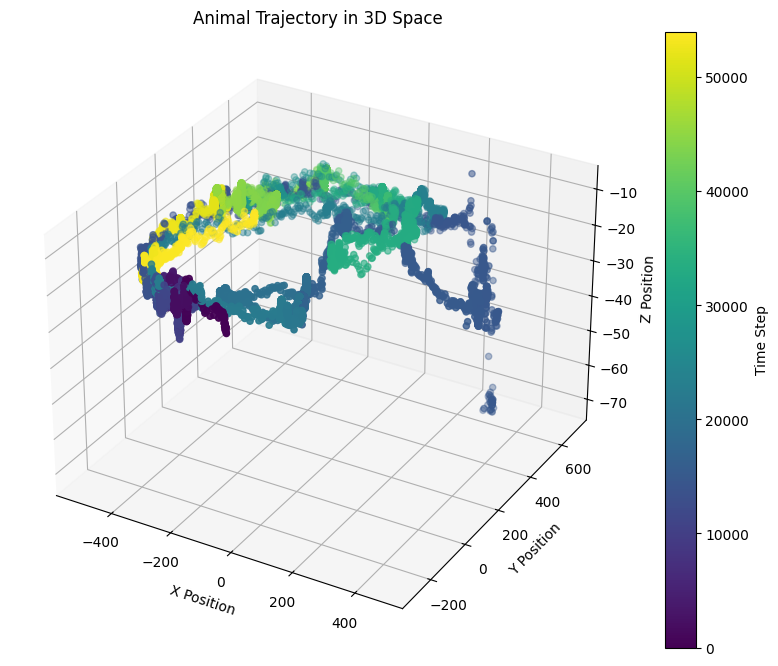

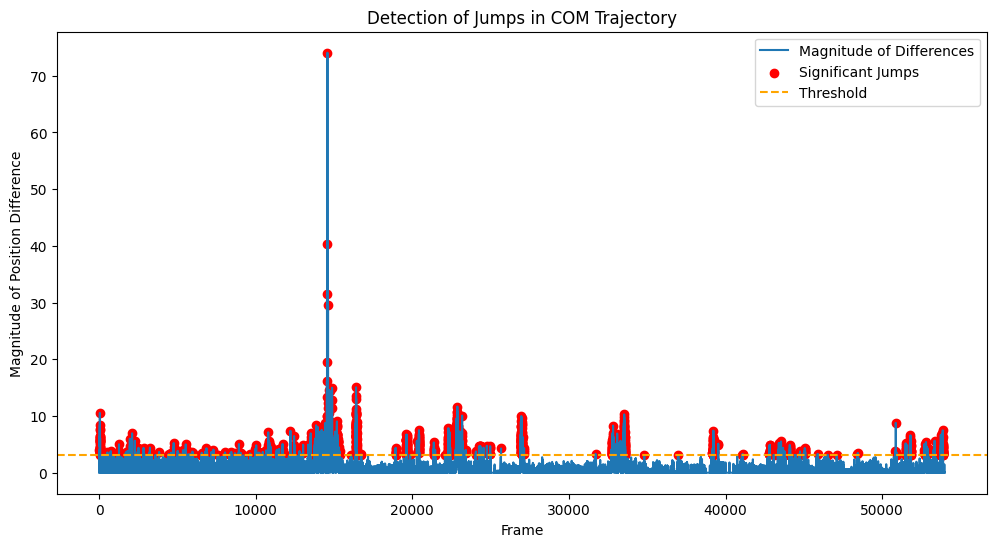

Frames with significant jumps: [   20    30    31 ... 53886 53892 53896]


In [7]:
#with weird graph, can do single analysis below:

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

base = '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/2024_07_01/230815PMC_left_hole_caffeine_15_32'
data = loadmat(os.path.join(base, 'COM/predict_results/com3d.mat'))
com_folder_save = os.path.join(base, 'COM/predict_results/vis')
com_data = data['com']

# Extract positions
x_positions = com_data[:, 0]
y_positions = com_data[:, 1]
z_positions = com_data[:, 2]

# Use the index as a proxy for time to generate a color gradient
time_steps = np.arange(len(x_positions))

# Plotting the 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a color map
cmap = plt.get_cmap('viridis')
# Normalize the time_steps to use with the color map
norm = plt.Normalize(time_steps.min(), time_steps.max())

scatter = ax.scatter(x_positions, y_positions, z_positions, c=time_steps, cmap=cmap, marker='o', norm=norm)
ax.set_title('Animal Trajectory in 3D Space')
ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_zlabel('Z Position')
fig.colorbar(scatter, ax=ax, label='Time Step')
# plt.savefig(os.path.join(com_folder_save, 'com_3d_trajectory_plot.jpg'), format='jpg')
plt.show()
plt.close()


# Calculate differences between consecutive positions
dx = np.diff(x_positions)
dy = np.diff(y_positions)
dz = np.diff(z_positions)

# Compute the magnitude of the differences
d_magnitude = np.sqrt(dx**2 + dy**2 + dz**2)

# Define a threshold for significant jumps (this can be adjusted based on your data)
threshold = np.mean(d_magnitude) + 2 * np.std(d_magnitude)

# Identify frames with significant jumps
significant_jumps = d_magnitude > threshold
jump_indices = np.where(significant_jumps)[0]

# Plotting the magnitude of differences
plt.figure(figsize=(12, 6))
plt.plot(d_magnitude, label='Magnitude of Differences')
plt.scatter(jump_indices, d_magnitude[jump_indices], color='red', label='Significant Jumps')
plt.axhline(threshold, color='orange', linestyle='--', label='Threshold')
plt.xlabel('Frame')
plt.ylabel('Magnitude of Position Difference')
plt.title('Detection of Jumps in COM Trajectory')
plt.legend()
# plt.savefig(os.path.join(com_folder_save, 'com_trajectory_jumps_plot.jpg'), format='jpg')
plt.show()
plt.close()

# np.save(os.path.join(com_folder_save, 'com_jump_indices.npy'), jump_indices)

# Output frames with significant jumps
print("Frames with significant jumps:", jump_indices)




In [8]:
#adopted Sihan's visulization script

import os
import numpy as np
import scipy.io as sio
import imageio
import tqdm
from projection import *

import matplotlib
# matplotlib.use("Agg")
import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter




def find_calib_file(base_folder):
    for file_name in os.listdir(base_folder):
        if file_name.endswith('label3d_dannce.mat'):
            return os.path.join(base_folder, file_name)
    return None

###############################################################################################################
# label3d_path = find_calib_file(base_base_folder)

# '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/20240603rec_240225V1left/videos/Camera1/0.mp4'
# video_path = os.path.join(base_folder, 'videos/Camera1/0.mp4')
# '/hpc/group/tdunn/lq53/dannce_chris_calib/240603rec_240225V1left/synced/V1_syned_calib_before_label3d_dannce.mat'
# '/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24summ/20240603rec_240225V1left/V1_syned_calib_before_label3d_dannce.mat' #calib
video_path = os.path.join(base, 'videos/Camera1/0.mp4')
label3d_path = find_calib_file(base)

# pred_path = os.path.join(base_folder, 'com3d.mat')
# N_FRAMES = 1000
# START_FRAME = 0
# ANIMAL= 'mouse20' #'mouse22'
cam = 'Camera1'
vid_title = graph_title
VID_NAME = vid_title + '.mp4'
# COLOR = connectivity.COLOR_DICT[ANIMAL]
# CONNECTIVITY = connectivity.CONNECTIVITY_DICT[ANIMAL]
save_path = os.path.join(com_foler, 'vis') #os.path.join(pred_path, 'vis')
if not os.path.exists(save_path):
    os.makedirs(save_path)

# com_file = '/hpc/group/tdunn/lq53/dannce_model_test_240118_ARC_mmtom/results_folder/dannce_predict_30f_300epoW/DANNCE_1000frames/predict_results/com3d_used.mat'
# com_data = sio.loadmat(com_file)
###############################################################################################################
# load camera parameters
cameras = load_cameras(label3d_path)

# get dannce predictions
# pred_3d = sio.loadmat(pred_path)['pred'][START_FRAME: START_FRAME+N_FRAMES]
pts = com_data[jump_indices]
print(len(pts))
N_FRAMES = len(jump_indices) #jump_indices
print('N_FRAMES', N_FRAMES)
# compute projections
pred_2d = {}
# pose_3d = np.transpose(pred_3d, (0, 2, 1))
# pts = np.reshape(pose_3d, (-1, 3))

# get the 2d projection
projpts = project_to_2d(pts,
                        cameras[cam]["K"],
                        cameras[cam]["r"],
                        cameras[cam]["t"])[:, :2]

projpts = distortPoints(projpts,
                        cameras[cam]["K"],
                        np.squeeze(cameras[cam]["RDistort"]),
                        np.squeeze(cameras[cam]["TDistort"]))
projpts = projpts.T
projpts = np.reshape(projpts, (N_FRAMES, -1, 2))
pred_2d[cam] = projpts
print('pred_2d',len(projpts))


del projpts#, pred_3d

# open videos
vids = imageio.get_reader(video_path)

# set up video writer
metadata = dict(title='dannce_visualization', artist='Matplotlib')
writer = FFMpegWriter(fps=4, metadata=metadata) # orig fps = 30., sihan uses 20, use 0.5 for com debug

###############################################################################################################
fig = plt.figure()
plt.rcParams['figure.figsize'] = (6, 6)


# def adjust_viewport(kpts_2d, margin=70):
#     """
#     Adjust the plot's viewport based on keypoints.
#     :param kpts_2d: Keypoints for the current frame.
#     :param margin: Extra space around the keypoints to ensure they are not on the edge.
#     """
#     # This method is way too shaky
#     # min_x, max_x = np.min(kpts_2d[:, 0]), np.max(kpts_2d[:, 0])
#     # min_y, max_y = np.min(kpts_2d[:, 1]), np.max(kpts_2d[:, 1])
#     # plt.xlim([min_x - margin, max_x + margin])
#     # plt.ylim([max_y + margin, min_y - margin])

#     center_x = np.mean(kpts_2d[:, 0])
#     center_y = np.mean(kpts_2d[:, 1])
#     plt.xlim([center_x - margin, center_x + margin])
#     plt.ylim([center_y + margin, center_y - margin])


with writer.saving(fig, os.path.join(save_path, "vis_"+VID_NAME), dpi=300):
    for curr_frame, i in enumerate(tqdm.tqdm(jump_indices)):
        # print(curr_frame, i)
        plt.clf()
        # grab images
        imgs = vids.get_data(i)
        kpts_2d = pred_2d[cam][curr_frame]
        
        temp_kpts_2d = np.r_[kpts_2d[0:6,:],kpts_2d[8:,:]]
        
         # Zoom in based on keypoints
        # adjust_viewport(temp_kpts_2d, margin=150)  # Adjust margin as needed for best fit


        plt.imshow(imgs)
        plt.scatter(temp_kpts_2d[:, 0], temp_kpts_2d[:, 1], marker='.', color='white', linewidths=2, alpha=0.5) #point size

        # for color, (index_from, index_to) in zip(COLOR, CONNECTIVITY):
        #     xs, ys = [np.array([kpts_2d[index_from, j], kpts_2d[index_to, j]]) for j in range(2)]
        #     plt.plot(xs, ys, c=color, lw=2) #line error
        #     del xs, ys

        plt.title(vid_title)
        plt.axis("off")
        
        
        writer.grab_frame()

2131
N_FRAMES 2131
pred_2d 2131


  6%|▌         | 118/2131 [05:43<1:32:13,  2.75s/it]